In [1]:
# DIRECTORY SET
import os
import sys
import traceback
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

# ENVIRONMENT VARIABLES
import dotenv
dotenv.load_dotenv()

# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


In [2]:
%load_ext autoreload
%autoreload 2

from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils
from destinyapp.customlibrary import controller

In [ ]:
discord_recaps_to_send=await services.discord.DiscordMessageHandler.compile_discord_messages(["75Btb7bWpqw"])

In [ ]:
await services.discord.DiscordMessageHandler.send_discord_recaps(discord_recaps_to_send)

In [3]:
video_id="OqVH_MTBQ6k"

Generating Plot for:  SPaeA8shXFg
Number of chunks:  27
Cost:  0.006936000000000001
Cost:  0.001815
Cost:  0.0018825
Results:  14
Results:  13
Total width: 9.999999999999998
Circle current x: 2.562058437659711
Circle current x: 4.750757941596728
Circle current x: 7.600132796691332
1305 1049
Generating Plot for:  Gej2eHRwlM0
Number of chunks:  18
Cost:  0.0067350000000000005
Cost:  0.005948500000000001
Error in update_controller.update_process for plot generation:  list index out of range
Generating Plot for:  B8Wb8arDcyQ
Number of chunks:  10


Traceback (most recent call last):
  File "d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject\destinyapp\customlibrary\controller.py", line 184, in update_latest_plots
    base64_plot_image, clickable_areas, annotated_results = await services.generate_plot(video_id)
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject\destinyapp\customlibrary\services\visualization.py", line 356, in generate_plot
    responses, annotated_results=await annotate_all_batches(chunk_batches, topic_annotations_str)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject\destinyapp\customlibrary\services\visualization.py", line 47, in annotate_all_batches
    annotated_results+=process_annotation_response(response, text_chunk_batches[i])
                       ^^^^^^^^^^^^^^

Cost:  0.004335
Cost:  0.0013682500000000001
Results:  10
Total width: 10.0
Circle current x: 5.345126055995509
1305 1049


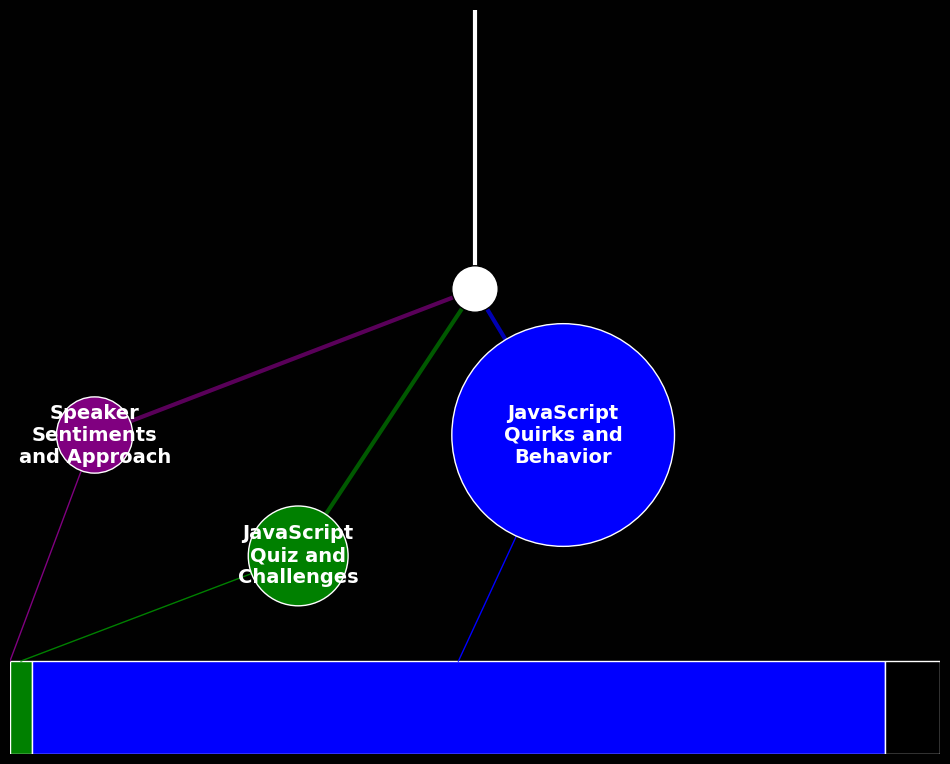

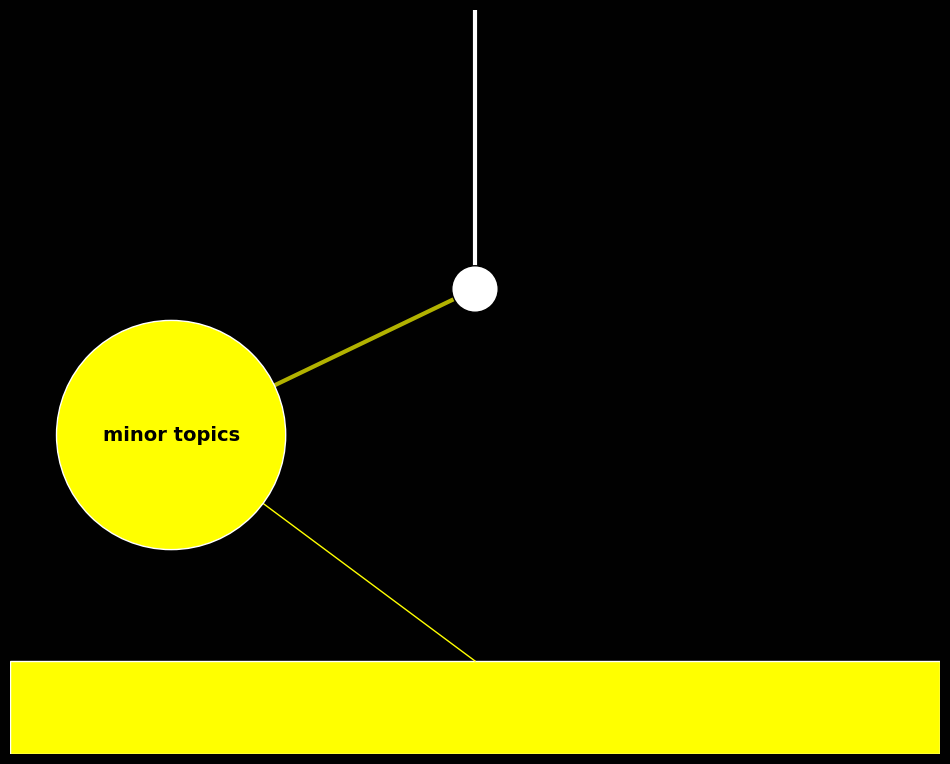

In [3]:
await controller.update_controller.update()

In [ ]:
try: 
    base64_plot_image, clickable_areas, annotated_results = await services.generate_plot(video_id)
    await services.save_plot(video_id, base64_plot_image, clickable_areas, annotated_results)
except Exception as e: 
    print("Error in auto_recap_controller.generate_all for plot generation: ", e)
    traceback.print_exc()

In [ ]:
await services.visualization.full_process(video_id)

In [ ]:
stream_recap_data=await utils.get_recap_data(video_id)

text_chunks_no_overlap = await services.visualization.create_text_chunks(stream_recap_data.transcript, 0)

chunk_batches = await services.visualization.generate_text_chunk_batches(text_chunks_no_overlap)

topic_annotations_str = await services.visualization.annotate_major_minor_topics(stream_recap_data.recap)

major_topics, minor_topics = services.visualization.process_topic_annotations_str(topic_annotations_str)

responses, annotated_results=await services.visualization.annotate_all_batches(chunk_batches, topic_annotations_str)

segments, category_locations, color_dict = await services.visualization.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics)

clickable_areas=await services.visualization.create_and_save_plot(video_id, segments, category_locations, color_dict)

clickable_areas, base64_plot_image = services.visualization.clickable_and_plot_image_finalization(video_id, clickable_areas)

stream_recap_data.plot_clickable_area_data=clickable_areas

In [4]:
stream_recap_data=await utils.get_recap_data(video_id)

In [5]:
text_chunks_no_overlap = await services.visualization.create_text_chunks(stream_recap_data.transcript, 0)

Number of chunks:  272


In [6]:
chunk_batches = await services.visualization.generate_text_chunk_batches(text_chunks_no_overlap)

In [7]:
topic_annotations_str = await services.visualization.annotate_major_minor_topics(stream_recap_data.recap)

Cost:  0.007353


In [8]:
major_topics, minor_topics = services.visualization.process_topic_annotations_str(topic_annotations_str)

In [10]:
responses, annotated_results=await services.visualization.annotate_all_batches(chunk_batches, topic_annotations_str)

Cost:  0.00139975
Cost:  0.0022725
Cost:  0.00166125
Cost:  0.00227225
Cost:  0.0024720000000000002
Cost:  0.00248225
Cost:  0.00236175
Cost:  0.0025397500000000003
Cost:  0.0029372499999999998
Cost:  0.003057
Cost:  0.00305025
Cost:  0.002322
Cost:  0.002572
Cost:  0.0032025
Results:  20
Results:  20
Results:  20
Results:  0 Text Chunks:  20  Returning blank equal to text chunks length
Results:  20
Results:  20
Results:  13 Text Chunks:  20  Returning blank equal to text chunks length
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  12


In [46]:
segments, category_locations, color_dict = await services.visualization.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics, stream_recap_data.transcript)

Total width: 10.000000000000002
Circle current x: 1.9023196200855015
Circle current x: 3.2636443490409914
Circle current x: 4.629864416479554
Circle current x: 6.030101325492675
Circle current x: 7.306712209504052
Circle current x: 8.709785663720275


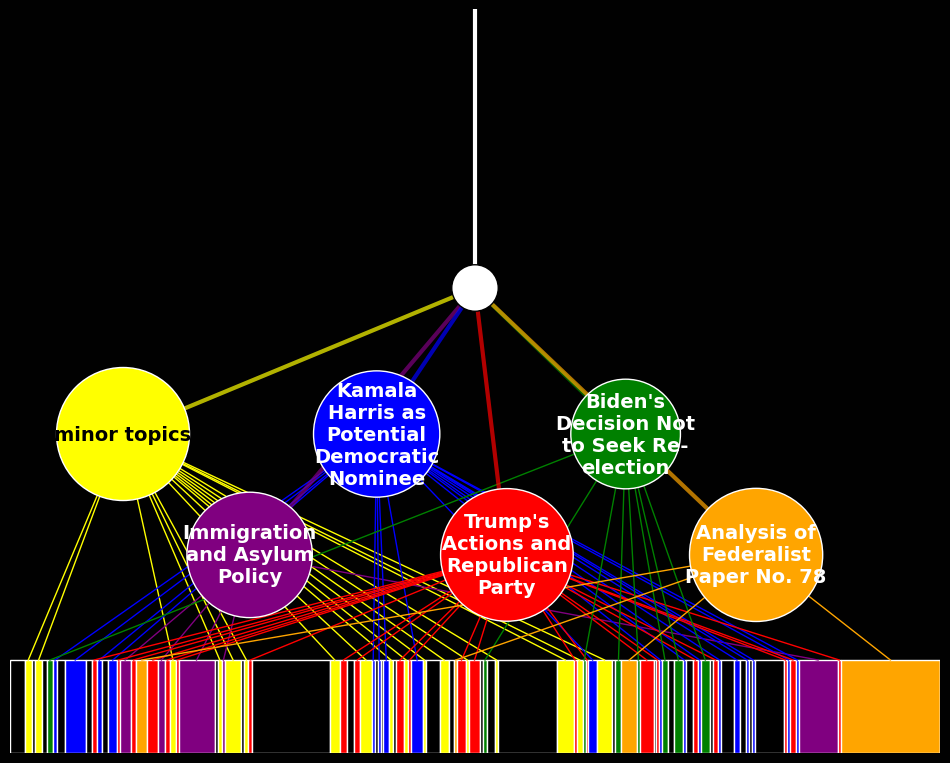

In [47]:
clickable_areas=await services.visualization.create_and_save_plot(video_id, segments, category_locations, color_dict)

In [48]:
clickable_areas, base64_plot_image = services.visualization.clickable_and_plot_image_finalization(video_id, clickable_areas)

1305 1049


In [49]:
stream_recap_data.plot_image=base64_plot_image
stream_recap_data.plot_clickable_area_data=clickable_areas
stream_recap_data.chunk_annotations=annotated_results

await sync_to_async(stream_recap_data.save)()

# Testing accuracy of annotations

{'segment': 8,
 'category': 'Non categorized',
 'annotation': "The text segment continues the discussion about Elon Musk's political leanings and his perceived resentment towards the Biden administration for not inviting him to an event.",
 'text': "ersonally pretty upset that when Biden had his, like, it was like an american ev showcase that he, like, didn't invite Elon Musk. And apparently this actually really upset Elon Musk, which is, which is what caused, well, hold on.\n\nDestiny: Remember, wasn't one of Trump's major reasons we for re getting involved in publicix in, was it 2011 or 2012 that. That Obama slightedama roasted him?\n\nB: Yeah. At the White House correspondent.\n\nDestiny: And he was so fucking ass mad. He sat there stewing so much. And I don't believe they ever had another one when Trump was in the White House. Right? They basically axed all of them, right?\n\nB: No, they had one. And then, yeah, they stopped after that or no. Excuse me, I'm sorry. He never showed u

In [24]:
char_index_test=stream_recap_data.transcript.find(annotated_results[249]["text"])
print(char_index_test)

236000


In [31]:
for i, segment in enumerate(segments): 
    print(i, segment["category"])

0 non categorized
1 minor topics
2 non categorized
3 minor topics
4 non categorized
5 Biden's Decision Not to Seek Re-election
6 Kamala Harris as Potential Democratic Nominee
7 non categorized
8 Kamala Harris as Potential Democratic Nominee
9 non categorized
10 Trump's Actions and Republican Party
11 Kamala Harris as Potential Democratic Nominee
12 non categorized
13 Kamala Harris as Potential Democratic Nominee
14 Trump's Actions and Republican Party
15 Immigration and Asylum Policy
16 Trump's Actions and Republican Party
17 Analysis of Federalist Paper No. 78
18 Trump's Actions and Republican Party
19 Immigration and Asylum Policy
20 Trump's Actions and Republican Party
21 minor topics
22 Trump's Actions and Republican Party
23 Immigration and Asylum Policy
24 non categorized
25 minor topics
26 Immigration and Asylum Policy
27 minor topics
28 non categorized
29 minor topics
30 Trump's Actions and Republican Party
31 non categorized
32 minor topics
33 Trump's Actions and Republican Pa

In [33]:
print(segments[100])

{'category': 'Analysis of Federalist Paper No. 78', 'width': 0.6485207100591716, 'color': 'orange', 'start': 15956, 'end': 17052}


In [28]:
len(segments)

102

In [25]:
time_seconds=utils.database_operations.find_time_at_char_count(stream_recap_data.linked_transcript, char_index_test)

In [34]:
# turn time and video id into a link
time_seconds="15956"
watch_link=f"https://www.youtube.com/watch?v={video_id}&t="+str(time_seconds)+"s"
print(watch_link)

https://www.youtube.com/watch?v=OqVH_MTBQ6k&t=15956s


In [27]:
annotated_results[0]

{'segment': 1,
 'category': 'Non Categorized',
 'annotation': 'This segment is about discussing laundry and ironing techniques. The user talks about experimenting with starch, the differences between ironing cotton and synthetic fabrics, and the pros and cons of using a steam iron versus a traditional iron.',
 'text': "Destiny: Wow. I feel like it's a huge mistake for buying out res. Well, we'll get to there. Hold on, hold on. Four DM's. I'm waking up earlier every day. I how much? I've been experimenting with the starch stuff. I don't think I like it. I don't think I like it. How much do you have to use to not like? Was it actually worth? Where are my ironers at? Was the next four years under Trump going to be for you? Well, considering I'll probably save more on my taxes than you'll make in a year, probably pretty good. If he wins, I I'm in what they call a win win situation, my friend. What'the? Blur. I should have bottom the camera, my water bottle, iron, my uniform for work for yo

In [23]:
for i, annotated_result in enumerate(annotated_results):
    # annotated_result["time"]=utils.database_operations.find_time_at_char_count(stream
    print(i, annotated_result["category"])

0 Non Categorized
1 Non Categorized
2 Testosterone Replacement Therapy (TRT)
3 Non Categorized
4 Trainwreckstv and Kick moderation
5 Non Categorized
6 Biden's Decision Not to Seek Re-election
7 Biden's Decision Not to Seek Re-election
8 Kamala Harris as Potential Democratic Nominee
9 Non Categorized
10 Non Categorized
11 Kamala Harris as Potential Democratic Nominee
12 Kamala Harris as Potential Democratic Nominee
13 Kamala Harris as Potential Democratic Nominee
14 Kamala Harris as Potential Democratic Nominee
15 Non Categorized
16 Trump's Actions and Republican Party
17 Kamala Harris as Potential Democratic Nominee
18 Non Categorized
19 Non Categorized
20 Kamala Harris as Potential Democratic Nominee
21 Kamala Harris as Potential Democratic Nominee
22 Trump's Actions and Republican Party
23 Immigration and Asylum Policy
24 Immigration and Asylum Policy
25 Immigration and Asylum Policy
26 Trump's Actions and Republican Party
27 Trump's Actions and Republican Party
28 Analysis of Federa